In [5]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1)/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [7]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [8]:
model.add(keras.layers.MaxPooling2D(2))

In [9]:
model.add(keras.layers.Conv2D(64, kernel_size=3,activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [10]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

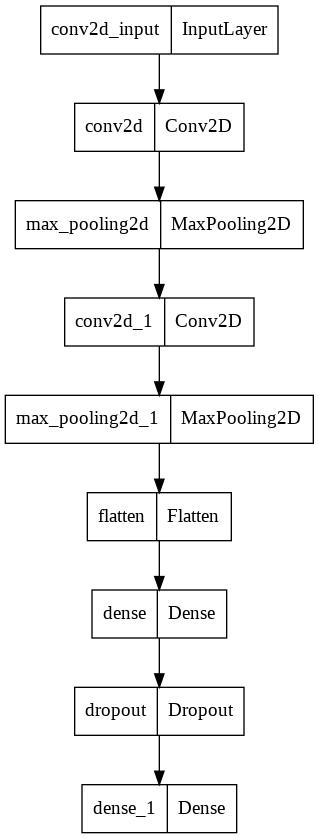

In [12]:
keras.utils.plot_model(model)

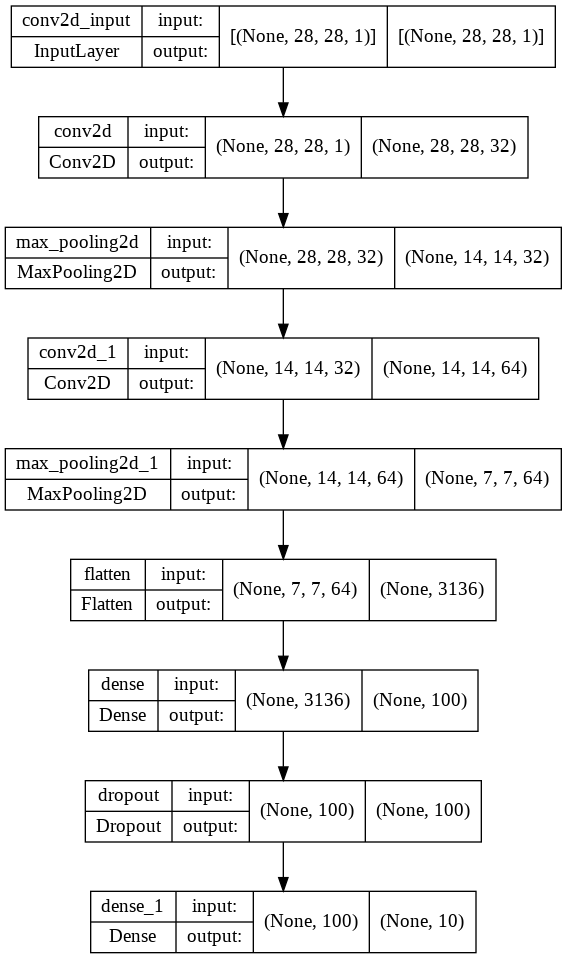

In [14]:
keras.utils.plot_model(model, show_shapes=True)

# 모델 컴파일과 훈련
# 케라스 API의 장점은 딥러닝 모델의 종류나 구성 방식에 상관없이 컴파일과 훈련 과정이 같다는 점이다.

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                 restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 64s 42ms/step - loss: 0.5338 - accuracy: 0.8072 - val_loss: 0.3441 - val_accuracy: 0.8686
Epoch 2/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.3484 - accuracy: 0.8752 - val_loss: 0.2874 - val_accuracy: 0.8935
Epoch 3/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.3018 - accuracy: 0.8899 - val_loss: 0.2567 - val_accuracy: 0.9031
Epoch 4/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2718 - accuracy: 0.9024 - val_loss: 0.2360 - val_accuracy: 0.9098
Epoch 5/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2419 - accuracy: 0.9101 - val_loss: 0.2395 - val_accuracy: 0.9138
Epoch 6/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2241 - accuracy: 0.9174 - val_loss: 0.2282 - val_accuracy: 0.9149
Epoch 7/20
1500/1500 [==============================] - 65s 44ms/step - loss: 0.2077 - accuracy: 0.9229 - val_loss: 0.2283 -

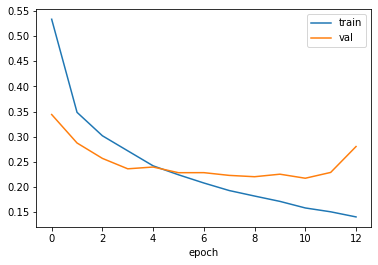

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

In [18]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 13ms/step - loss: 0.2172 - accuracy: 0.9270


[0.21718746423721313, 0.9269999861717224]

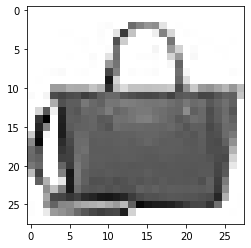

In [20]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [21]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.4902491e-18 8.1732212e-25 1.4480255e-23 2.6755514e-19 2.1857173e-23
  2.1640513e-19 7.0180620e-21 1.7983312e-18 1.0000000e+00 4.5228132e-19]]


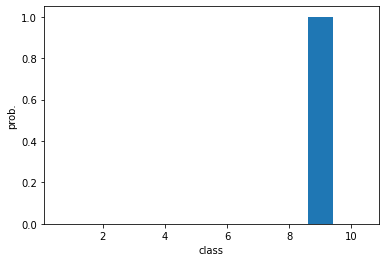

In [22]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [23]:
classes= ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [24]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [25]:
test_scaled =test_input.reshape(-1,28,28,1)/ 255.0

In [26]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2411 - accuracy: 0.9157


[0.24108439683914185, 0.9157000184059143]